In [10]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import starbars
from scipy.stats import pearsonr
from matplotlib.backends.backend_pdf import PdfPages
from statsmodels.nonparametric.smoothers_lowess import lowess
wr.filterwarnings('ignore')

df = pd.read_excel("summary_tests.xlsx")
#print(df)

KeyboardInterrupt: 

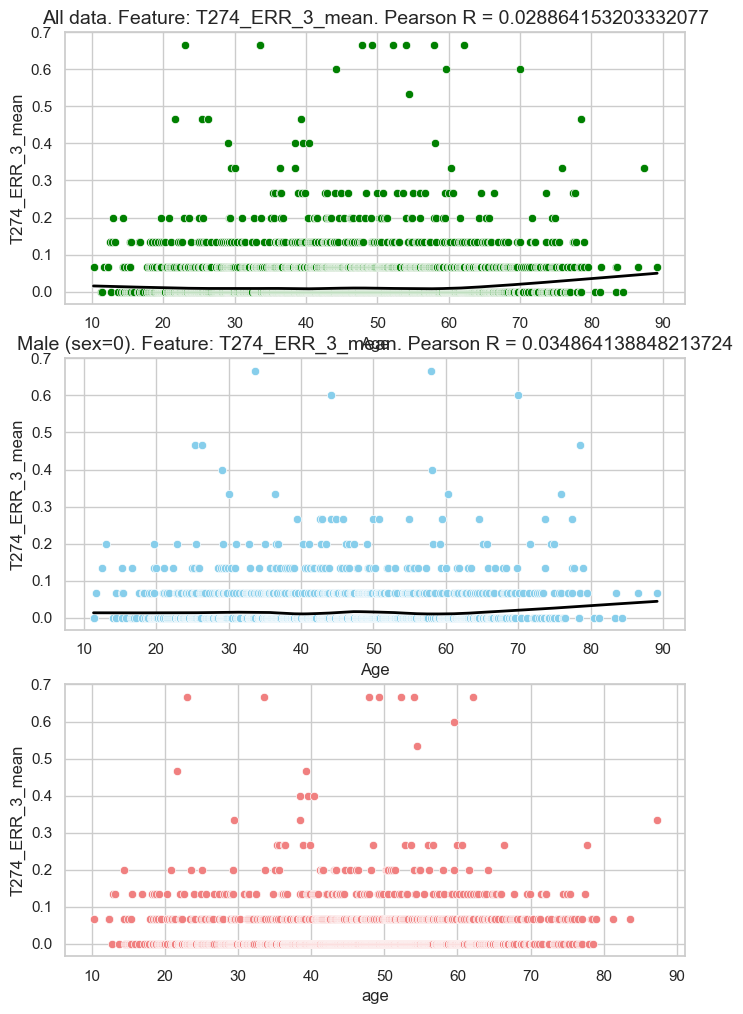

In [ ]:
features = [column for column in df.columns if column not in ['id_sample', 'age', 'sex', 'Unnamed: 0']]
males = df[df['sex'] == 0] 
females = df[df['sex'] == 1] 

with PdfPages('third_task.pdf') as pdf:
    for i, feature in enumerate(features):
        fig, ax = plt.subplots(3, 1, figsize=(8, 12))
        groups = [
            ("All data", df, 'green'),
            ("Male (sex=0)", df[df['sex'] == 0], 'skyblue'),
            ("Female (sex=1)", df[df['sex'] == 1], 'lightcoral')
        ]
        for ax, (group_name, group_data, color) in zip(ax, groups):
            #pearsonr
            r, p = pearsonr(group_data[feature], group_data['age'])
            sns.scatterplot(data=group_data, x='age', y=feature, color=color, ax=ax)
            #lowess
            lowess_fit = lowess(group_data[feature], group_data['age'], frac=0.3)
            ax.plot(lowess_fit[:, 0], lowess_fit[:, 1], color='black', linewidth=2)
            ax.set_title(f'{group_name}. Feature: {feature}. Pearson R = {round(r, 3)}', fontsize=14)
            ax.set_xlabel('Age')
            ax.set_ylabel(feature)

        plt.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)  
